In [71]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import os
import glob
from glob import glob
import re
import tkinter as tk
from tkinter import filedialog
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats
from scipy.stats import sem
import statsmodels.api as sm
import statistics
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%config InlineBackend.figure_format = 'retina'# this increases sharpness of figure display 
colors = ['#0E86D4','#d7301f'] #virgin/D18 (use #FAA41F for D10)

In [72]:
export_path = '/Volumes/lab-kohlj/home/shared/projects/VolumeProject/plots' 

### 0. Notes
• QuPath detections were performed on (1) MPOA subregions (MPN, MPO, ADP, PS, PD); (2) Alp5, (3) MOs5 <br>
• detections happened to be performed separately for MPOA (round 1) and Alp5/MOs5 (round 2); turns out that MPOA detections are also in the Alp5/MOs5 files, but since detections were not run on a few sections in which Alp5/MOs5 was damaged (but MPOA intact), will use detections from round 1 for now. <br>
• detection files contain all detected neurons and their areas (--> cell size) <br>
• annotation files (_annot_) contain total number of detected neurons per area, as well as the area size

### 1. Import the data (unmixed)

In [73]:
# make a function which gives the difference between two lists --> to get all files which don't contain *annot*
def Diff(li1, li2):
    return list(set(li1) - set(li2)) + list(set(li2) - set(li1))

#### 1.1 Text files
Read in all text files from parent 'detection' directory for detection analyses

In [74]:
# make lists of filenames for the two different types of files (annotations and detection files)
filenames = glob('/Volumes/lab-kohlj/home/shared/projects/VolumeProject/Neurotrace/original/detection/text_files/*.txt')
filenames_ann = glob('/Volumes/lab-kohlj/home/shared/projects/VolumeProject/Neurotrace/original/detection/text_files/*annot*.txt')
filenames_det = Diff(filenames, filenames_ann)

In [75]:
display(filenames_det)

['/Volumes/lab-kohlj/home/shared/projects/VolumeProject/Neurotrace/original/detection/text_files/7P-section1.txt',
 '/Volumes/lab-kohlj/home/shared/projects/VolumeProject/Neurotrace/original/detection/text_files/8V-section4.txt',
 '/Volumes/lab-kohlj/home/shared/projects/VolumeProject/Neurotrace/original/detection/text_files/6V-section2.txt',
 '/Volumes/lab-kohlj/home/shared/projects/VolumeProject/Neurotrace/original/detection/text_files/VL-4P_section5.txt',
 '/Volumes/lab-kohlj/home/shared/projects/VolumeProject/Neurotrace/original/detection/text_files/6V-section5.txt',
 '/Volumes/lab-kohlj/home/shared/projects/VolumeProject/Neurotrace/original/detection/text_files/8P-section7.txt',
 '/Volumes/lab-kohlj/home/shared/projects/VolumeProject/Neurotrace/original/detection/text_files/1P-section5.txt',
 '/Volumes/lab-kohlj/home/shared/projects/VolumeProject/Neurotrace/original/detection/text_files/VL-6P_section1.txt',
 '/Volumes/lab-kohlj/home/shared/projects/VolumeProject/Neurotrace/origina

In [77]:
ann_list = [pd.read_table(file) for file in filenames_ann]

In [78]:
df_ann = pd.concat(ann_list)

In [76]:
det_list = [pd.read_table(file) for file in filenames_det]

EmptyDataError: No columns to parse from file

In [50]:
#read the files into pandas, then concatenate them (this creates a dataframe)

df_det = pd.concat(det_list)

EmptyDataError: No columns to parse from file

In [79]:
display(df_ann)

,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Allen ID,Parent Allen ID,Side,Area µm^2,Perimeter µm,Num Detections
0,6V-Scan2.tif,Agranular insular area,AI,Isocortex,Geometry,4701.9,4861.90,95,315,0,673898.7,6616.30,NaN
1,6V-Scan2.tif,"Primary motor area, Layer 1",MOp1,Primary motor area,Geometry,5189.8,646.63,320,985,0,238253.3,4433.70,NaN
2,6V-Scan2.tif,"Supplemental somatosensory area, layer 5",SSs5,Supplemental somatosensory area,Geometry,4744.7,3667.60,1090,378,0,587312.1,5319.80,NaN
3,6V-Scan2.tif,"Primary somatosensory area, unassigned, layer 1",SSp-un1,"Primary somatosensory area, unassigned",Geometry,5690.2,1281.80,182305693,182305689,0,88420.1,1898.70,NaN
4,6V-Scan2.tif,"Endopiriform nucleus, dorsal part",EPd,Endopiriform nucleus,Geometry,5050.2,5068.50,952,942,0,209675.2,2566.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2P-section2.tif,"Anterior cingulate area, dorsal part, layer 6b",ACAd6b,"Anterior cingulate area, dorsal part",Geometry,4875.0,1824.90,927,39,0,8144.0,732.66,NaN
161,2P-section2.tif,Olfactory tubercle,OT,Striatum ventral region,Geometry,4479.3,6001.70,754,493,0,1190392.2,7346.70,NaN
162,2P-section2.tif,"Primary somatosensory area, upper limb, layer 4",SSp-ul4,"Primary somatosensory area, upper limb",Geometry,5181.2,1371.50,577,369,0,357553.6,4497.80,NaN
163,2P-section2.tif,Cerebral nuclei,CNU,Cerebrum,Geometry,4673.5,4056.50,623,567,0,18064621.9,33576.40,NaN


In [68]:
mPOA_df = df_det[df_det["Parent"].isin(['Medial preoptic area', 'Anterodorsal preoptic nucleus',
                 'Parastrial nucleus', 'Medial preoptic nucleus'])] 

In [73]:
mPOA_df.Parent.unique()

array(['Medial preoptic area', 'Anterodorsal preoptic nucleus',
       'Parastrial nucleus', 'Medial preoptic nucleus'], dtype=object)

#### 1.2 AIp5 / MOs5 files
--> in separate subfolder (VL only need to subset AIp5 and MOs5 rows into own df)

In [6]:
# filenamesAM = glob('/Volumes/lab-kohlj/home/shared/people/Vanessa/text_files/*annot*.txt')
# filenamesAM_ann = glob('/Volumes/lab-kohlj/home/shared/people/Vanessa/text_files/*annot*.txt')
# filenamesAM_det = Diff(filenamesAM, filenamesAM_ann)

In [7]:
# annAM_list = [pd.read_table(file) for file in filenamesAM_ann]
# dfAM_ann = pd.concat(annAM_list)

# detAM_list = [pd.read_table(file) for file in filenamesAM_det]
# dfAM_det = pd.concat(detAM_list)

In [74]:
AM_df = df_det[df_det["Parent"].isin(['Agranular insular area, posterior part, layer 5', 
                                      'Secondary motor area, layer 5'])] 
AM_df.Parent.unique()

array(['Agranular insular area, posterior part, layer 5',
       'Secondary motor area, layer 5'], dtype=object)

### 2. MPOA neuron soma size (area)
#### 2.1 across all MPOA regions

In [75]:
# sort rows based on whether detections are from virgins or pregnant females
vir_det = mPOA_df[mPOA_df['Image'].str.contains('V_Scan')]
preg_det = mPOA_df[mPOA_df['Image'].str.contains('P_Scan')]

In [76]:
vir_areas = vir_det['Nucleus: Area']
preg_areas = preg_det['Nucleus: Area']

In [77]:
preg_det.Parent.unique() # DF sanity check

array(['Medial preoptic area', 'Anterodorsal preoptic nucleus',
       'Parastrial nucleus', 'Medial preoptic nucleus'], dtype=object)

In [78]:
print(f"Mean area virgin: {vir_areas.mean()}")
print(f"Mean area pregnant: {preg_areas.mean()}")

Mean area virgin: 146.0119983495483
Mean area pregnant: 156.43557389767682


##### Mann Whitney U test

In [79]:
print(f"\nvirgin vs pregnant: {scipy.stats.mannwhitneyu(vir_areas, preg_areas)}")


virgin vs pregnant: MannwhitneyuResult(statistic=243126184.5, pvalue=1.1957485623356633e-62)


##### Plot

In [80]:
# first make a new 'state' column and concate the two dataframes; this makes it easier to plot
vir_det['State'] = 'virgin'
preg_det['State'] = 'pregnant'
df = pd.concat([vir_det, preg_det], axis=0)

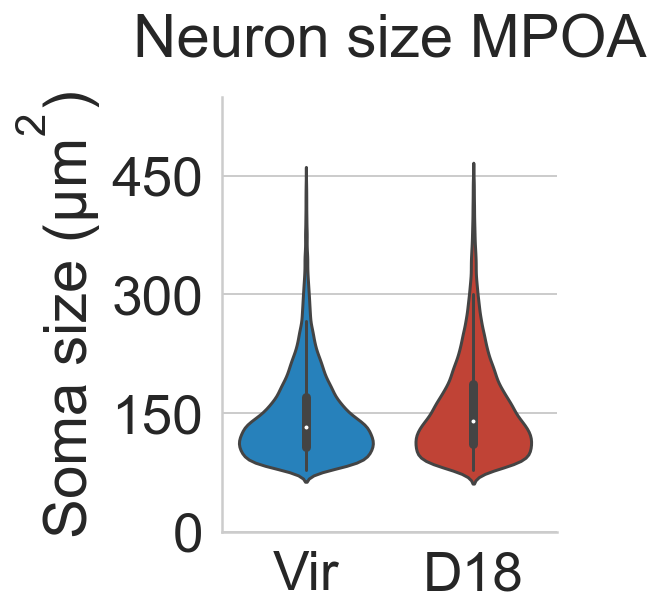

In [81]:
sns.set(rc={"figure.figsize": (3, 4)})
sns.set(font_scale=2.5) 
sns.set_style("whitegrid")
g = sns.violinplot(data=df, x="State", y="Nucleus: Area", palette = colors)
g.set_xticklabels(['Vir','D18'])
g.set_title('Neuron size MPOA', pad=20)
g.set_xlabel('')
g.set_ylabel('Soma size ($\mathregular{µm^{2}}$)')
sns.despine() 
plt.ylim(0, 550)
g.yaxis.set_major_locator(plt.MaxNLocator(4));

filename = os.path.join(export_path, 'soma_size_neurons_panMPOA_unmixed.pdf')
plt.savefig(filename, dpi=300, transparent=True, bbox_inches = "tight")

#### 2.2 per MPOA subregion

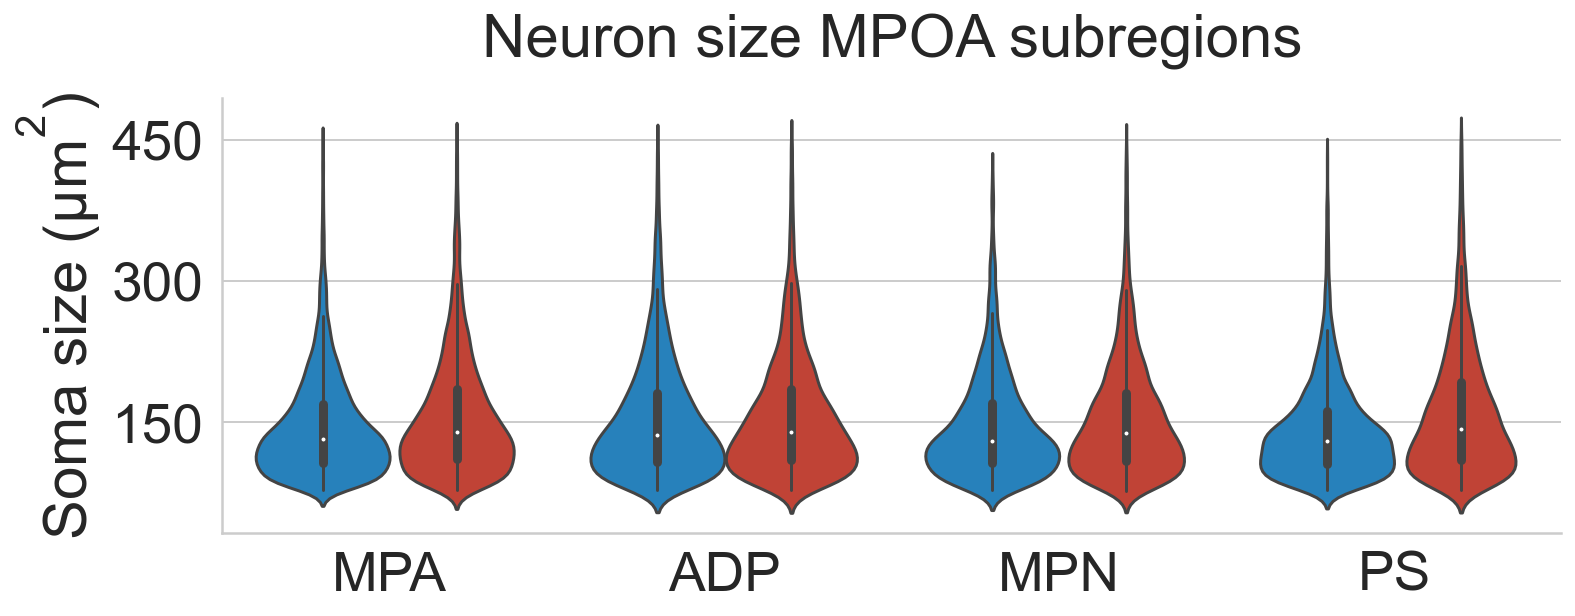

In [82]:
sns.set(rc={"figure.figsize": (12, 4)})
sns.set(font_scale=2.5) 
sns.set_style("whitegrid")
g = sns.violinplot(data=df, x="Parent", y="Nucleus: Area", hue="State", palette=colors)
g.set_title('Neuron size MPOA subregions', pad=20)
g.set_xlabel('')
g.set_xticklabels(['MPA','ADP','MPN','PS']) # no PD
g.set_ylabel('Soma size ($\mathregular{µm^{2}}$)')
g.legend_.remove()
sns.despine() 
# plt.ylim(0, 100)
g.yaxis.set_major_locator(plt.MaxNLocator(4));

filename = os.path.join(export_path, 'soma_size_neurons_MPOA_subregions_unmixed_v2.pdf')
plt.savefig(filename, dpi=300, transparent=True, bbox_inches = "tight")

#### Stats for subregions
Note that these are will be corrected for multiple (5 in this case) comparisons below

In [83]:
vir_mpo = vir_det[vir_det['Parent'] == 'Medial preoptic area']
vir_areas_mpo = vir_mpo['Nucleus: Area']
preg_mpo = preg_det[preg_det['Parent'] == 'Medial preoptic area']
preg_areas_mpo = preg_mpo['Nucleus: Area']

vir_adp = vir_det[vir_det['Parent'] == 'Anterodorsal preoptic nucleus']
vir_areas_adp = vir_adp['Nucleus: Area']
preg_adp = preg_det[preg_det['Parent'] == 'Anterodorsal preoptic nucleus']
preg_areas_adp = preg_adp['Nucleus: Area']

vir_ps = vir_det[vir_det['Parent'] == 'Parastrial nucleus']
vir_areas_ps = vir_ps['Nucleus: Area']
preg_ps = preg_det[preg_det['Parent'] == 'Parastrial nucleus']
preg_areas_ps = preg_ps['Nucleus: Area']

vir_mpn = vir_det[vir_det['Parent'] == 'Medial preoptic nucleus']
vir_areas_mpn = vir_mpn['Nucleus: Area']
preg_mpn = preg_det[preg_det['Parent'] == 'Medial preoptic nucleus']
preg_areas_mpn = preg_mpn['Nucleus: Area']

# vir_pd = vir_det[vir_det['Parent'] == 'Posterodorsal preoptic nucleus']
# vir_areas_pd = vir_pd['Nucleus: Area']
# preg_pd = preg_det[preg_det['Parent'] == 'Posterodorsal preoptic nucleus']
# preg_areas_pd = preg_pd['Nucleus: Area']

print(f"Mean area MPO virgin: {vir_areas_mpo.mean()}; MPO pregnant: {preg_areas_mpo.mean()}")
print(f"MPO virgin vs pregnant: {scipy.stats.mannwhitneyu(vir_areas_mpo, preg_areas_mpo)}")

print(f"\nMean area ADP virgin: {vir_areas_adp.mean()}; ADP pregnant: {preg_areas_adp.mean()}")
print(f"ADP virgin vs pregnant: {scipy.stats.mannwhitneyu(vir_areas_adp, preg_areas_adp)}")

print(f"\nMean area PS virgin: {vir_areas_ps.mean()}; PS pregnant: {preg_areas_ps.mean()}")
print(f"PS virgin vs pregnant: {scipy.stats.mannwhitneyu(vir_areas_ps, preg_areas_ps)}")

print(f"\nMean area MPN virgin: {vir_areas_mpn.mean()}; MPN pregnant: {preg_areas_mpn.mean()}")
print(f"MPN virgin vs pregnant: {scipy.stats.mannwhitneyu(vir_areas_mpn, preg_areas_mpn)}")

# print(f"\nMean area PD virgin: {vir_areas_pd.mean()}; PD pregnant: {preg_areas_pd.mean()}")
# print(f"PD virgin vs pregnant: {scipy.stats.mannwhitneyu(vir_areas_pd, preg_areas_pd)}")

Mean area MPO virgin: 145.2457404103479; MPO pregnant: 156.36364507474127
MPO virgin vs pregnant: MannwhitneyuResult(statistic=52862868.5, pvalue=1.5318278441661155e-34)

Mean area ADP virgin: 153.3911611138737; ADP pregnant: 155.6438
ADP virgin vs pregnant: MannwhitneyuResult(statistic=7342166.0, pvalue=0.04399192145365289)

Mean area PS virgin: 145.58923381770146; PS pregnant: 153.37869520897044
PS virgin vs pregnant: MannwhitneyuResult(statistic=6894088.5, pvalue=5.127263560504351e-08)

Mean area MPN virgin: 141.1482405789868; MPN pregnant: 159.52239245727756
MPN virgin vs pregnant: MannwhitneyuResult(statistic=8690718.0, pvalue=6.981907649787307e-34)


In [148]:
pvals = [1.5318278441661155e-34, 0.04399192145365289, 5.127263560504351e-08, 6.981907649787307e-34]
statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='bonferroni') # fdr_bh 

(array([ True, False,  True,  True]),
 array([6.12731138e-34, 1.75967686e-01, 2.05090542e-07, 2.79276306e-33]),
 0.012741455098566168,
 0.0125)

### 3. MPOA neuron density

#### 3.1 Reformat data

In [123]:
# add a State column
df_ann.loc[df_ann['Image'].str.contains('V_'), 'State'] = 'virgin'
df_ann.loc[df_ann['Image'].str.contains('P_'), 'State'] = 'pregnant'

# only keep MPOA subregions
mpoa = ['ADP', 'PS', 'MPN', 'MPO']
df_ann = df_ann[(df_ann['Class'].isin(mpoa))]
df_ann.Class.unique() # DF sanity check
display(df_ann)

,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Allen ID,Parent Allen ID,Side,Num Detections,Area µm^2,Perimeter µm,State
16,VL-4P_Scan1_section3.ome.tif,Anterodorsal preoptic nucleus,ADP,Periventricular region,Geometry,1811.5,4741.0,72.0,141.0,0.0,541.0,276930.1,2714.5,pregnant
39,VL-4P_Scan1_section3.ome.tif,Parastrial nucleus,PS,Periventricular region,Geometry,1678.7,4634.5,1109.0,141.0,0.0,389.0,198538.3,2543.2,pregnant
73,VL-4P_Scan1_section3.ome.tif,Medial preoptic area,MPO,Periventricular region,Geometry,1424.0,4593.0,523.0,141.0,0.0,0.0,414546.9,7038.0,pregnant
150,VL-4P_Scan1_section3.ome.tif,Medial preoptic nucleus,MPN,Hypothalamic medial zone,Geometry,1284.1,4615.3,515.0,467.0,0.0,0.0,15530.8,1072.8,pregnant
94,VL-2V_Scan3_section1.ome.tif,Medial preoptic area,MPO,Periventricular region,Geometry,1581.3,4371.7,523.0,141.0,0.0,652.0,395672.1,6654.7,virgin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,VL-1V_Scan1_section7.ome.tif,Parastrial nucleus,PS,Periventricular region,Geometry,2009.6,4049.7,1109.0,141.0,0.0,201.0,113792.1,2088.3,virgin
117,VL-1V_Scan1_section7.ome.tif,Medial preoptic nucleus,MPN,Hypothalamic medial zone,Geometry,1576.6,4927.0,515.0,467.0,0.0,619.0,324340.2,3166.5,virgin
19,VL-1V_Scan1_section2.ome.tif,Medial preoptic area,MPO,Periventricular region,Geometry,1822.6,5058.5,523.0,141.0,0.0,733.0,393850.1,6554.9,virgin
55,VL-1V_Scan1_section2.ome.tif,Parastrial nucleus,PS,Periventricular region,Geometry,2025.8,5023.7,1109.0,141.0,0.0,415.0,201422.4,2561.6,virgin


In [124]:
# add new column where area is in mm2
df_ann['Area_mm2'] = df_ann['Area µm^2'] / 1e6
display(df_ann)

# add new neuron density column
df_ann['neuron_density'] = df_ann['Num Detections'] / df_ann['Area_mm2']

# add new sample ID column
df_ann.loc[df_ann['Image'].str.contains('1V'), 'ID'] = '1V'
df_ann.loc[df_ann['Image'].str.contains('2V'), 'ID'] = '2V'
df_ann.loc[df_ann['Image'].str.contains('3V'), 'ID'] = '3V'
df_ann.loc[df_ann['Image'].str.contains('4P'), 'ID'] = '4P'
df_ann.loc[df_ann['Image'].str.contains('5P'), 'ID'] = '5P'
df_ann.loc[df_ann['Image'].str.contains('6P'), 'ID'] = '6P'

# remove row(s) with zero values in Detections
df_ann = df_ann[df_ann['Num Detections'] != 0]
display(df_ann)

,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Allen ID,Parent Allen ID,Side,Num Detections,Area µm^2,Perimeter µm,State,Area_mm2
16,VL-4P_Scan1_section3.ome.tif,Anterodorsal preoptic nucleus,ADP,Periventricular region,Geometry,1811.5,4741.0,72.0,141.0,0.0,541.0,276930.1,2714.5,pregnant,0.276930
39,VL-4P_Scan1_section3.ome.tif,Parastrial nucleus,PS,Periventricular region,Geometry,1678.7,4634.5,1109.0,141.0,0.0,389.0,198538.3,2543.2,pregnant,0.198538
73,VL-4P_Scan1_section3.ome.tif,Medial preoptic area,MPO,Periventricular region,Geometry,1424.0,4593.0,523.0,141.0,0.0,0.0,414546.9,7038.0,pregnant,0.414547
150,VL-4P_Scan1_section3.ome.tif,Medial preoptic nucleus,MPN,Hypothalamic medial zone,Geometry,1284.1,4615.3,515.0,467.0,0.0,0.0,15530.8,1072.8,pregnant,0.015531
94,VL-2V_Scan3_section1.ome.tif,Medial preoptic area,MPO,Periventricular region,Geometry,1581.3,4371.7,523.0,141.0,0.0,652.0,395672.1,6654.7,virgin,0.395672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,VL-1V_Scan1_section7.ome.tif,Parastrial nucleus,PS,Periventricular region,Geometry,2009.6,4049.7,1109.0,141.0,0.0,201.0,113792.1,2088.3,virgin,0.113792
117,VL-1V_Scan1_section7.ome.tif,Medial preoptic nucleus,MPN,Hypothalamic medial zone,Geometry,1576.6,4927.0,515.0,467.0,0.0,619.0,324340.2,3166.5,virgin,0.324340
19,VL-1V_Scan1_section2.ome.tif,Medial preoptic area,MPO,Periventricular region,Geometry,1822.6,5058.5,523.0,141.0,0.0,733.0,393850.1,6554.9,virgin,0.393850
55,VL-1V_Scan1_section2.ome.tif,Parastrial nucleus,PS,Periventricular region,Geometry,2025.8,5023.7,1109.0,141.0,0.0,415.0,201422.4,2561.6,virgin,0.201422


,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Allen ID,Parent Allen ID,Side,Num Detections,Area µm^2,Perimeter µm,State,Area_mm2,neuron_density,ID
16,VL-4P_Scan1_section3.ome.tif,Anterodorsal preoptic nucleus,ADP,Periventricular region,Geometry,1811.5,4741.0,72.0,141.0,0.0,541.0,276930.1,2714.5,pregnant,0.276930,1953.561567,4P
39,VL-4P_Scan1_section3.ome.tif,Parastrial nucleus,PS,Periventricular region,Geometry,1678.7,4634.5,1109.0,141.0,0.0,389.0,198538.3,2543.2,pregnant,0.198538,1959.319688,4P
94,VL-2V_Scan3_section1.ome.tif,Medial preoptic area,MPO,Periventricular region,Geometry,1581.3,4371.7,523.0,141.0,0.0,652.0,395672.1,6654.7,virgin,0.395672,1647.829099,2V
98,VL-2V_Scan3_section1.ome.tif,Anterodorsal preoptic nucleus,ADP,Periventricular region,Geometry,2004.6,4447.2,72.0,141.0,0.0,287.0,174677.2,2193.7,virgin,0.174677,1643.030687,2V
102,VL-2V_Scan3_section1.ome.tif,Medial preoptic nucleus,MPN,Hypothalamic medial zone,Geometry,1480.2,4330.0,515.0,467.0,0.0,120.0,65480.3,1745.9,virgin,0.065480,1832.612251,2V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,VL-1V_Scan1_section7.ome.tif,Parastrial nucleus,PS,Periventricular region,Geometry,2009.6,4049.7,1109.0,141.0,0.0,201.0,113792.1,2088.3,virgin,0.113792,1766.379213,1V
117,VL-1V_Scan1_section7.ome.tif,Medial preoptic nucleus,MPN,Hypothalamic medial zone,Geometry,1576.6,4927.0,515.0,467.0,0.0,619.0,324340.2,3166.5,virgin,0.324340,1908.489913,1V
19,VL-1V_Scan1_section2.ome.tif,Medial preoptic area,MPO,Periventricular region,Geometry,1822.6,5058.5,523.0,141.0,0.0,733.0,393850.1,6554.9,virgin,0.393850,1861.114165,1V
55,VL-1V_Scan1_section2.ome.tif,Parastrial nucleus,PS,Periventricular region,Geometry,2025.8,5023.7,1109.0,141.0,0.0,415.0,201422.4,2561.6,virgin,0.201422,2060.346813,1V


In [107]:
df_ann.Class.unique()

array(['PS', 'MPO', 'ADP'], dtype=object)

#### 3.2 per MPOA subregion

In [125]:
# group df by Class and ID, then calculate mean value for each; flatten and reset index
df_ann2 = df_ann.groupby(['Class','ID', 'State']).agg({'neuron_density': 'mean'})
df_ann2.columns = ['mean_neuron_density']
df_ann2 = df_ann2.reset_index()
df_ann2

,Class,ID,State,mean_neuron_density
0,ADP,1V,virgin,1839.069783
1,ADP,2V,virgin,1591.814189
2,ADP,3V,virgin,1904.725302
3,ADP,4P,pregnant,1870.314985
4,ADP,5P,pregnant,1987.545561
5,ADP,6P,pregnant,1867.258419
6,MPN,1V,virgin,1922.110531
7,MPN,2V,virgin,1636.054819
8,MPN,3V,virgin,1866.642370
9,MPN,4P,pregnant,1935.833388


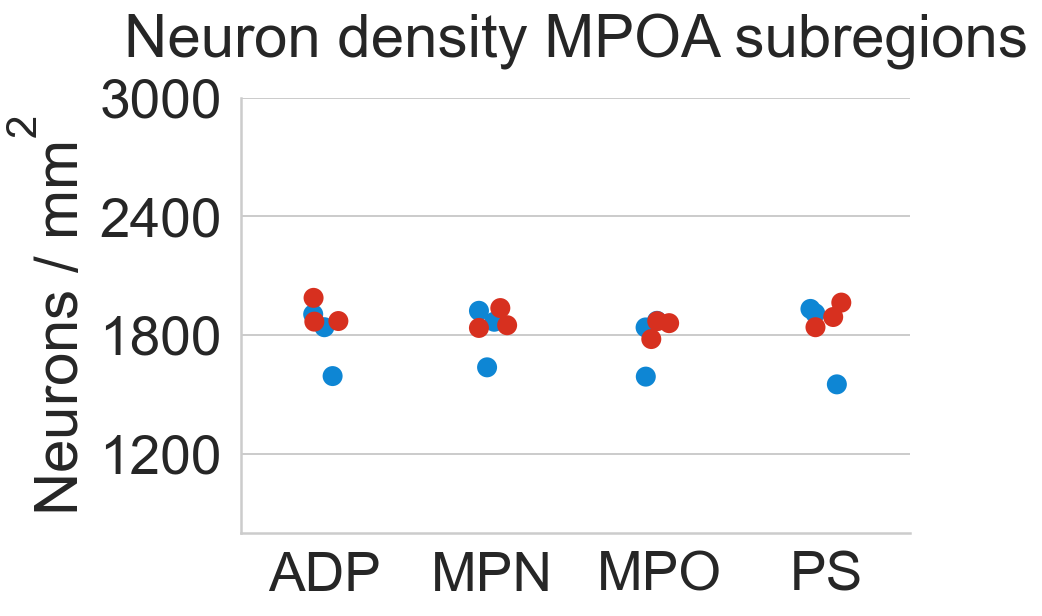

In [128]:
sns.set(rc={"figure.figsize": (6, 4)})
sns.set(font_scale=2.5) 
sns.set_style("whitegrid")
g = sns.stripplot(data=df_ann2, x="Class", y="mean_neuron_density", hue="State", palette=colors, size=10, dodge=False)
g.set_title('Neuron density MPOA subregions', pad=20)
g.set_xlabel('')
g.set_ylabel('Neurons / $\mathregular{mm^{2}}$')
g.legend_.remove()
sns.despine() 
plt.ylim(800, 3000)
g.yaxis.set_major_locator(plt.MaxNLocator(4));

filename = os.path.join(export_path, 'neuron_density_MPOA_subregions_VL.pdf')
plt.savefig(filename, dpi=300, transparent=True, bbox_inches = "tight")

#### 3.3 Across MPOA

In [129]:
# group by individual and calculate average neuron density across all areas for each individual; flatten and reset index
df_ann3 = df_ann.groupby(['ID', 'State']).agg({'neuron_density': 'mean'})
df_ann3.columns = ['mean_neuron_density']
df_ann3 = df_ann3.reset_index()
df_ann3

,ID,State,mean_neuron_density
0,1V,virgin,1890.534952
1,2V,virgin,1591.718477
2,3V,virgin,1880.883069
3,4P,pregnant,1871.359365
4,5P,pregnant,1914.058319
5,6P,pregnant,1845.435429


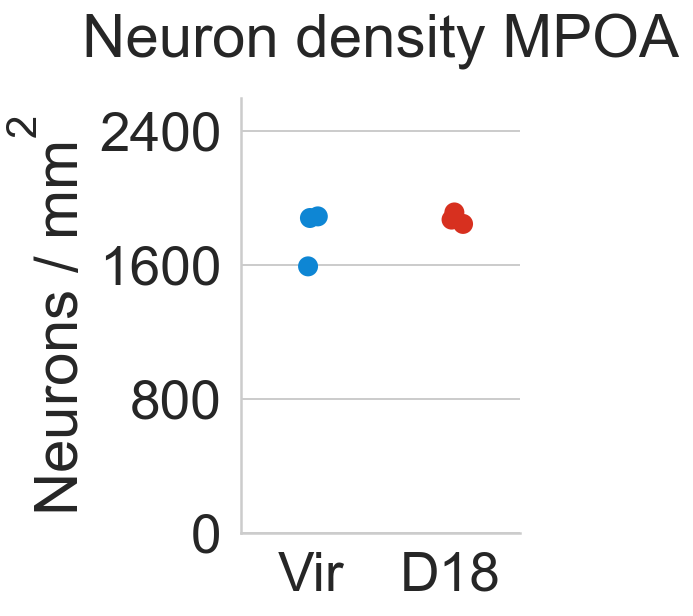

In [130]:
sns.set(rc={"figure.figsize": (2.5, 4)})
sns.set(font_scale=2.5)
sns.set_style("whitegrid")
g = sns.stripplot(data=df_ann3, x="State", y="mean_neuron_density", palette = colors, size=10)
g.set_xticklabels(['Vir','D18'])
g.set_title('Neuron density MPOA', pad=20)
g.set_xlabel('')
g.set_ylabel('Neurons / $\mathregular{mm^{2}}$')
sns.despine() 
plt.ylim(0, 2600)
g.yaxis.set_major_locator(plt.MaxNLocator(4));

filename = os.path.join(export_path, 'neuron_density_panMPOA.pdf')
plt.savefig(filename, dpi=300, transparent=True, bbox_inches = "tight")

### 4. Alp5 / MOs5 neuron soma size 
--> for this, we're using the detection dataframe

In [131]:
# sort rows based on whether detections are from virgins or pregnant females
virAM_det = AM_df[AM_df['Image'].str.contains('V_Scan')]
pregAM_det = AM_df[AM_df['Image'].str.contains('P_Scan')]
# sort into Alp5 vs MOs5
virA_det = virAM_det[virAM_det['Parent'].str.contains('Agranular')]
pregA_det = pregAM_det[pregAM_det['Parent'].str.contains('Agranular')]
virM_det = virAM_det[virAM_det['Parent'].str.contains('Secondary')]
pregM_det = pregAM_det[pregAM_det['Parent'].str.contains('Secondary')]

In [132]:
# Alp5
virA_areas = virA_det['Nucleus: Area']
pregA_areas = pregA_det['Nucleus: Area']
print(f"Mean neuron soma size Alp5 virgin: {virA_areas.mean()}")
print(f"Mean neuron soma size Alp5 pregnant: {pregA_areas.mean()}")

# MOs5
virM_areas = virM_det['Nucleus: Area']
pregM_areas = pregM_det['Nucleus: Area']
print(f"\nMean neuron soma size MOs5 virgin: {virM_areas.mean()}")
print(f"Mean neuron soma size MOs5 pregnant: {pregM_areas.mean()}")

Mean neuron soma size Alp5 virgin: 147.74506737247353
Mean neuron soma size Alp5 pregnant: 158.4560546875

Mean neuron soma size MOs5 virgin: 140.08003425961172
Mean neuron soma size MOs5 pregnant: 147.54244694132333


In [133]:
print(f"\nAlp5 virgin vs pregnant: {scipy.stats.mannwhitneyu(virA_areas, pregA_areas)}")
print(f"\nMOs5 virgin vs pregnant: {scipy.stats.mannwhitneyu(virM_areas, pregM_areas)}")


Alp5 virgin vs pregnant: MannwhitneyuResult(statistic=6594332.5, pvalue=3.1966060134258196e-18)

MOs5 virgin vs pregnant: MannwhitneyuResult(statistic=54607217.5, pvalue=1.0162924705556967e-20)


#### Plot

In [134]:
# first make a new 'state' column and concate the two dataframes; this makes it easier to plot
virA_det['State'] = 'virgin'
virM_det['State'] = 'virgin'
pregA_det['State'] = 'pregnant'
pregM_det['State'] = 'pregnant'
df_AM = pd.concat([virA_det, virM_det, pregA_det, pregM_det], axis=0)

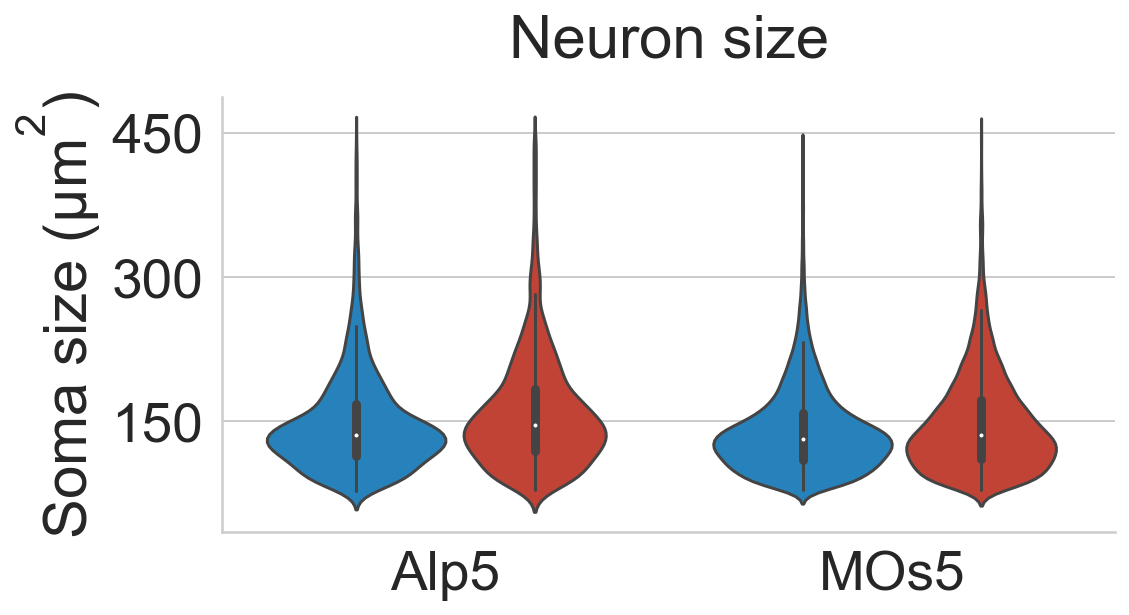

In [135]:
sns.set(rc={"figure.figsize": (8, 4)})
sns.set(font_scale=2.5) 
sns.set_style("whitegrid")
g = sns.violinplot(data=df_AM, x="Parent", y="Nucleus: Area", hue = 'State', palette = colors)
g.set_xticklabels(['Alp5','MOs5'])
g.set_title('Neuron size', pad=20)
g.set_xlabel('')
g.set_ylabel('Soma size ($\mathregular{µm^{2}}$)')
sns.despine() 
plt.legend([],[], frameon=False)
# plt.ylim(0, 550)
g.yaxis.set_major_locator(plt.MaxNLocator(4));

# filename = os.path.join(export_path, 'soma_size_neurons_panMPOA.pdf')
# plt.savefig(filename, dpi=300, transparent=True, bbox_inches = "tight")

### 5. AIp5 / MOs5 neuron density 

#### 5.1 Reformat data

In [136]:
# add a State column
dfAM_ann.loc[dfAM_ann['Image'].str.contains('V_section'), 'State'] = 'virgin'
dfAM_ann.loc[dfAM_ann['Image'].str.contains('P_section'), 'State'] = 'pregnant'

# only keep AIp5, MOs5
AM = ['AIp5', 'MOs5']
dfAM_ann = dfAM_ann[(dfAM_ann['Class'].isin(AM))]

NameError: name 'dfAM_ann' is not defined

In [30]:
# add new column where area is in mm2
dfAM_ann['Area_mm2'] = dfAM_ann['Area µm^2'] / 1e6

# add new neuron density column
dfAM_ann['neuron_density'] = dfAM_ann['Num Detections'] / dfAM_ann['Area_mm2']

# add new sample ID column
dfAM_ann.loc[dfAM_ann['Image'].str.contains('1V'), 'ID'] = '1V'
dfAM_ann.loc[dfAM_ann['Image'].str.contains('3V'), 'ID'] = '3V'
dfAM_ann.loc[dfAM_ann['Image'].str.contains('4P'), 'ID'] = '4P'
dfAM_ann.loc[dfAM_ann['Image'].str.contains('5P'), 'ID'] = '5P'
dfAM_ann.loc[dfAM_ann['Image'].str.contains('6P'), 'ID'] = '6P'

In [31]:
# group df by area and ID, then calculate mean value for each; flatten and reset index
dfAM_ann2 = dfAM_ann.groupby(['Class','ID', 'State']).agg({'neuron_density': 'mean'})
dfAM_ann2.columns = ['mean_neuron_density']
dfAM_ann2 = dfAM_ann2.reset_index()
dfAM_ann2

,Class,ID,State,mean_neuron_density
0,AIp5,1V,virgin,1517.548484
1,AIp5,3V,virgin,839.450984
2,AIp5,4P,pregnant,1127.674682
3,AIp5,5P,pregnant,1599.636148
4,AIp5,6P,pregnant,1033.908849
5,MOs5,1V,virgin,1286.221193
6,MOs5,3V,virgin,1530.699073
7,MOs5,4P,pregnant,1593.064055
8,MOs5,5P,pregnant,1553.554232
9,MOs5,6P,pregnant,1569.280873


#### 5.2 Plot

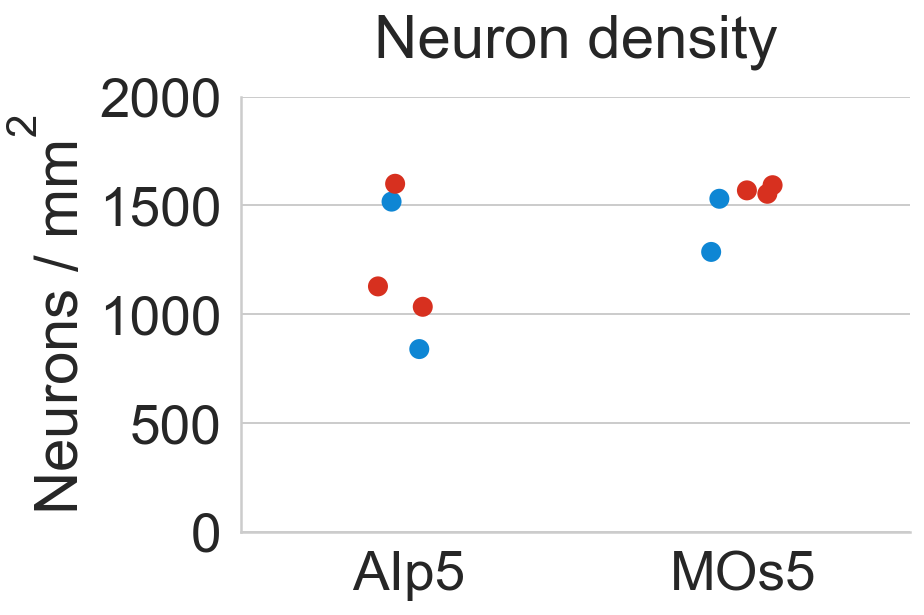

In [32]:
sns.set(rc={"figure.figsize": (6, 4)})
sns.set(font_scale=2.5) 
sns.set_style("whitegrid")
g = sns.stripplot(data=dfAM_ann2, x="Class", y="mean_neuron_density", hue="State", palette=colors, size=10, dodge=False)
g.set_title('Neuron density', pad=20)
g.set_xlabel('')
g.set_ylabel('Neurons / $\mathregular{mm^{2}}$')
g.legend_.remove()
sns.despine() 
plt.ylim(0, 2000)
g.yaxis.set_major_locator(plt.MaxNLocator(4));

# filename = os.path.join(export_path, 'neuron_density_MPOA_subregions.pdf')
# plt.savefig(filename, dpi=300, transparent=True, bbox_inches = "tight")

### 6. Positive control: compare cortical w/ MPOA soma size 
--> to check whether these sample sizes, and our detection method, is actually sensitive enough to detect differences. Cortical layer 5 neurons are expected to be much bigger than e.g. MPOA neurons

In [62]:
# from MPOA df, only keep MPO detections; concatenate the detection dataframes from MPO and AIf5/MOs5; filter by virgin
df_mpo = df[(df['Parent'] == 'Medial preoptic area')]
df_ctrl = pd.concat([df_mpo, df_AM], axis=0)
df_ctrl = df_ctrl[(df_ctrl['State'] == 'virgin')]
# df_ctrl.head(-10)

#### 6.1 Plot

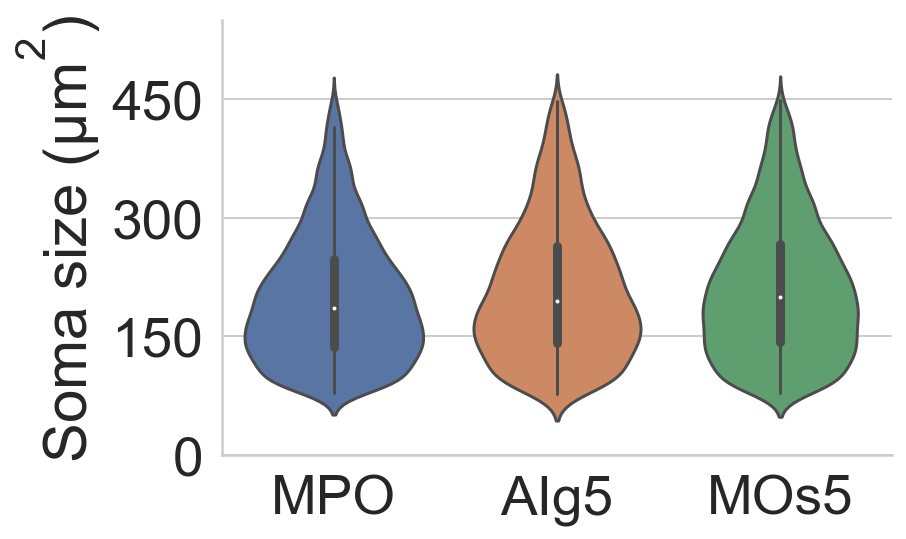

In [105]:
sns.set(rc={"figure.figsize": (6, 4)})
sns.set(font_scale=2.5) 
sns.set_style("whitegrid")
g = sns.violinplot(data=df_ctrl, x="Parent", y="Nucleus: Area")
g.set_xticklabels(['MPO','AIg5', 'MOs5'])
# g.set_title('Neuron size MPOA', pad=20)
g.set_xlabel('')
g.set_ylabel('Soma size ($\mathregular{µm^{2}}$)')
sns.despine() 
plt.ylim(0, 550)
g.yaxis.set_major_locator(plt.MaxNLocator(4));

filename = os.path.join(export_path, 'soma_size_neurons_mpo_AIg5_MOs5.pdf')
plt.savefig(filename, dpi=300, transparent=True, bbox_inches = "tight")

In [99]:
# sort rows based on detections area; remove zero values, if necessary (need to convert back to series in that case, since list is returned)
mpo_det = df_ctrl[df_ctrl['Parent'].str.contains('preoptic')]
AIg5_det = df_ctrl[df_ctrl['Parent'].str.contains('Agranular')]
MOs5_det = df_ctrl[df_ctrl['Parent'].str.contains('motor')]

mpo_areas = mpo_det['Nucleus: Area']
mpo_areas = [i for i in mpo_areas if i != 0]
mpo_areas = pd.Series(mpo_areas) 
AIg5_areas = AIg5_det['Nucleus: Area']
MOs5_areas = MOs5_det['Nucleus: Area']
MOs5_areas = [i for i in MOs5_areas if i != 0]
MOs5_areas = pd.Series(MOs5_areas) 

Mean area MPO: 199.50152371042068; AIg5: 209.40726681127984
MPO vs AIg5: MannwhitneyuResult(statistic=10193330.5, pvalue=4.2555261025132885e-07)


#### 6.2 Stats

In [117]:
print(f"Mean area MPO: {round(mpo_areas.mean(),2)} +/- {round(mpo_areas.sem(),2)} \
      \nMean area AIg5: {round(AIg5_areas.mean(),2)} +/- {round(AIg5_areas.sem(),2)}")
print(f"MPO vs AIg5: {scipy.stats.mannwhitneyu(mpo_areas, AIg5_areas)}")

print(f"\nMean area MPO: {round(mpo_areas.mean(),2)} +/- {round(mpo_areas.sem(),2)} \
      \nMean area MOs5: {round(MOs5_areas.mean(),2)} +/- {round(MOs5_areas.sem(),2)}")
print(f"MPO vs MOs5: {scipy.stats.mannwhitneyu(mpo_areas, MOs5_areas)}")

print(f"\nMean area AIg5: {round(AIg5_areas.mean(),2)} +/- {round(AIg5_areas.sem(),2)} \
\nMean area MOs5: {round(MOs5_areas.mean(),2)} +/- {round(MOs5_areas.sem(),2)}")
print(f"MPO vs MOs5: {scipy.stats.mannwhitneyu(AIg5_areas, MOs5_areas)}")

Mean area MPO: 199.5 +/- 0.98       
Mean area AIg5: 209.41 +/- 1.51
MPO vs AIg5: MannwhitneyuResult(statistic=10193330.5, pvalue=4.2555261025132885e-07)

Mean area MPO: 199.5 +/- 0.98       
Mean area MOs5: 211.11 +/- 1.1
MPO vs MOs5: MannwhitneyuResult(statistic=18626844.5, pvalue=6.610798749776872e-14)

Mean area AIg5: 209.41 +/- 1.51 
Mean area MOs5: 211.11 +/- 1.1
MPO vs MOs5: MannwhitneyuResult(statistic=9530396.0, pvalue=0.12656673512814115)


--> so looks like we can detect soma size differences between cortical and hypothalamic neurons! In contrast, no significant size difference btw the two cortical neuron types